# QUESTION 1

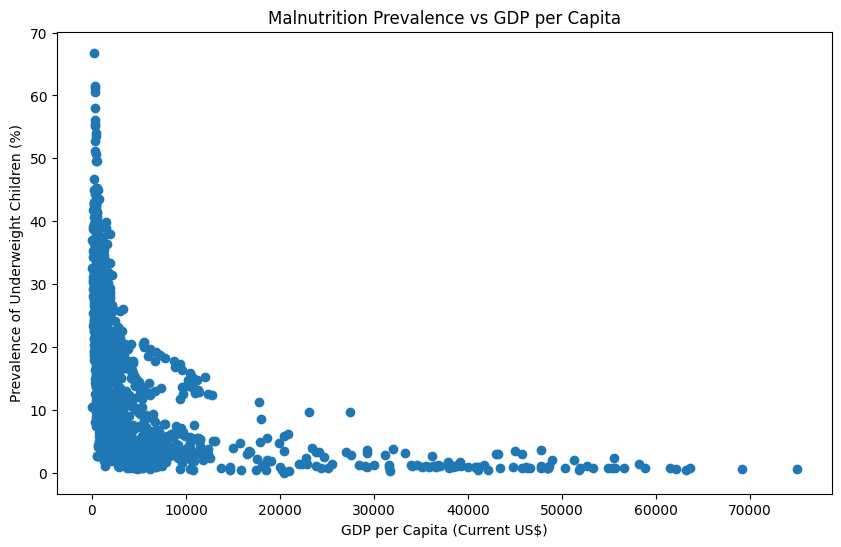

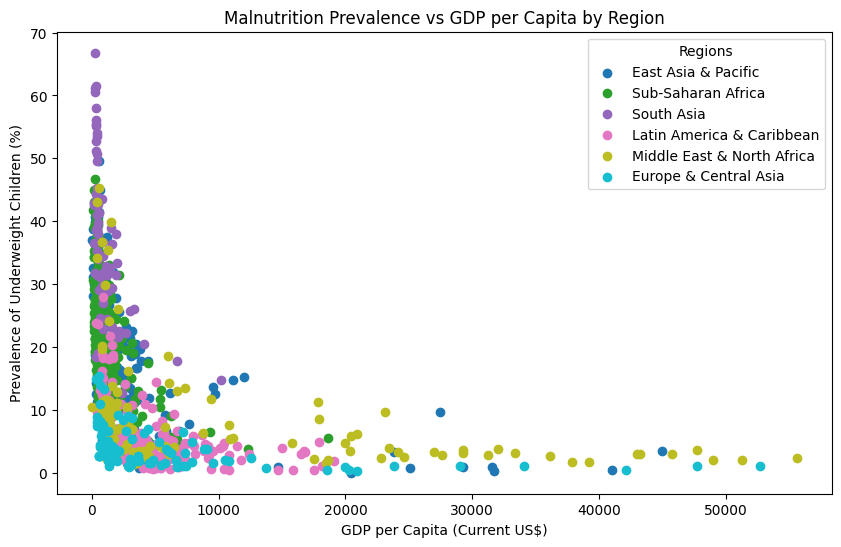

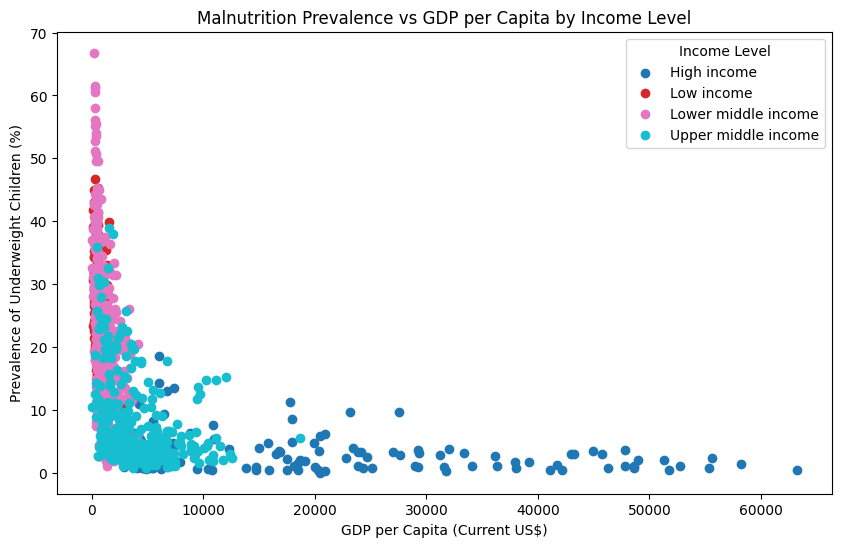

In [5]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import quandl as qd
from tabulate import tabulate
import numpy as np
import matplotlib as mpl  

# loading GDP per capita data (current US$)
gdp_per_capita_data_frame = pd.read_csv('GDP_per_capita.csv', skiprows=4)  # skipping the first four rows

# loading Prevalence of underweight children (% of children under 5)
prevelance_of_underweight_data_frame = pd.read_csv('prevelance_of_underweight.csv', skiprows=4)  # skipping the first four rows

# loading metadata countries data
meta_data_country_data_frame = pd.read_csv('meta_data_country.csv')

# Melting the data so that years become a column
gdp_per_capita_melted = pd.melt(gdp_per_capita_data_frame, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='GDP_per_capita')
prevelance_of_underweight_melted = pd.melt(prevelance_of_underweight_data_frame, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Underweight_Prevalence')

# Merging the datasets on the country code and year
data = pd.merge(gdp_per_capita_melted, prevelance_of_underweight_melted, on=['Country Code', 'Country Name', 'Year'])
final_merge = pd.merge(data, meta_data_country_data_frame, on=['Country Code'])

# Scatter plot of Malnutrition Prevalence against GDP per Capita
plt.figure(figsize=(10, 6))
plt.scatter(gdp_per_capita_melted['GDP_per_capita'], prevelance_of_underweight_melted['Underweight_Prevalence'])
plt.xlabel('GDP per Capita (Current US$)')
plt.ylabel('Prevalence of Underweight Children (%)')
plt.title('Malnutrition Prevalence vs GDP per Capita')
plt.show()

# Filtering out North America
filtered_data = final_merge[final_merge['Region'] != 'North America']
filtered_data = filtered_data.dropna()

# Defining regions and colors
regions = filtered_data['Region'].unique()
colors = plt.get_cmap('tab10', len(regions))  # Updated to use plt.get_cmap()

# Creating scatter plot for each region
plt.figure(figsize=(10, 6))
for region in regions:
    region_data = filtered_data[filtered_data['Region'] == region]
    plt.scatter(region_data['GDP_per_capita'], region_data['Underweight_Prevalence'], label=region, color=colors(regions.tolist().index(region)))

plt.xlabel('GDP per Capita (Current US$)')
plt.ylabel('Prevalence of Underweight Children (%)')
plt.title('Malnutrition Prevalence vs GDP per Capita by Region')
plt.legend(title='Regions')
plt.show()

# Filtering out rows with missing 'Income Level'
filtered_data_income = final_merge[~final_merge['IncomeGroup'].isnull()]

# Defining income levels and colors
income_levels = filtered_data_income['IncomeGroup'].unique()
colors_income = plt.get_cmap('tab10', len(income_levels))  # Updated to use plt.get_cmap()

# Creating scatter plot for each income level
plt.figure(figsize=(10, 6))
for income_level in income_levels:
    income_data = filtered_data_income[filtered_data_income['IncomeGroup'] == income_level]
    plt.scatter(income_data['GDP_per_capita'], income_data['Underweight_Prevalence'], label=income_level, color=colors_income(income_levels.tolist().index(income_level)))

plt.xlabel('GDP per Capita (Current US$)')
plt.ylabel('Prevalence of Underweight Children (%)')
plt.title('Malnutrition Prevalence vs GDP per Capita by Income Level')
plt.legend(title='Income Level')
plt.show()


# QUESTION 2

In [6]:


# Fetching data from Quandl
API_KEY = "AMjuqTyytSgA99NSyCqD" 
wheat_data = qd.get("COM/PWHEAMT_USD", api_key=API_KEY)
crude_oil_data = qd.get("WGEC/WLD_CRUDE_WTI", api_key=API_KEY)
gold_data = qd.get("BUNDESBANK/BBK01_WT5511", api_key=API_KEY)

print(wheat_data)
# Renaming the price columns for clarity
wheat_data.rename(columns={'Value': 'Wheat Price'}, inplace=True)
crude_oil_data.rename(columns={'Value': 'Crude Oil Price'}, inplace=True)
gold_data.rename(columns={'Value': 'Gold Price'}, inplace=True)

# Joining the datasets on their common date
merged_data = pd.concat([wheat_data['Wheat Price'], crude_oil_data['Crude Oil Price'], gold_data['Gold Price']], axis=1)

# Droping rows with missing values
merged_data.dropna(inplace=True)
# Ploting the time series
plt.figure(figsize=(10, 6))
wheat_line, = plt.plot(merged_data.index, merged_data['Wheat Price'], label='Wheat', color='blue')
crude_line, = plt.plot(merged_data.index, merged_data['Crude Oil Price'], label='Crude Oil', color='green')
gold_line, = plt.plot(merged_data.index, merged_data['Gold Price'], label='Gold', color='orange')

# Wheat max and min
wheat_max_date = merged_data['Wheat Price'].idxmax()
wheat_min_date = merged_data['Wheat Price'].idxmin()
wheat_max_value = merged_data.loc[wheat_max_date, 'Wheat Price']
wheat_min_value = merged_data.loc[wheat_min_date, 'Wheat Price']

# Add scatter points
wheat_max_marker = plt.scatter(wheat_max_date, wheat_max_value, color='blue', marker='o', zorder=5)
wheat_min_marker = plt.scatter(wheat_min_date, wheat_min_value, color='blue', marker='x', zorder=5)

# Crude oil max and min
crude_max_date = merged_data['Crude Oil Price'].idxmax()
crude_min_date = merged_data['Crude Oil Price'].idxmin()
crude_max_value = merged_data.loc[crude_max_date, 'Crude Oil Price']
crude_min_value = merged_data.loc[crude_min_date, 'Crude Oil Price']

crude_max_marker = plt.scatter(crude_max_date, crude_max_value, color='green', marker='o', zorder=5)
crude_min_marker = plt.scatter(crude_min_date, crude_min_value, color='green', marker='x', zorder=5)

# Gold max and min
gold_max_date = merged_data['Gold Price'].idxmax()
gold_min_date = merged_data['Gold Price'].idxmin()
gold_max_value = merged_data.loc[gold_max_date, 'Gold Price']
gold_min_value = merged_data.loc[gold_min_date, 'Gold Price']

gold_max_marker = plt.scatter(gold_max_date, gold_max_value, color='orange', marker='o', zorder=5)
gold_min_marker = plt.scatter(gold_min_date, gold_min_value, color='orange', marker='x', zorder=5)

# Adding labels and main legend for lines
plt.title('Price Comparison of Wheat, Crude Oil, and Gold')
plt.xlabel('Date')
plt.ylabel('Price in USD')

# Adding custom legends for the markers (max and min points)
plt.legend([wheat_line, crude_line, gold_line, wheat_max_marker, wheat_min_marker, 
            crude_max_marker, crude_min_marker, gold_max_marker, gold_min_marker], 
           ['Wheat', 'Crude Oil', 'Gold', 
            'Wheat Max', 'Wheat Min', 
            'Crude Oil Max', 'Crude Oil Min', 
            'Gold Max', 'Gold Min'], loc='best')

plt.grid(True)

# Showing the plot
plt.show()




QuandlError: (Status 410) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@quandl.com.

# QUESTION 3 

In [11]:

# Loading datasets
CO2_Emissions = pd.read_csv("C02_Emissions.csv")
primary_enrollment = pd.read_csv("primary_enrollment.csv")

# Extracting relevant columns: 'Country Name', 'Country Code', 'Year', and the column for 2010
# For CO2 Emissions
co2_2010 = CO2_Emissions[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2010']].copy()
co2_2010.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'CO2 Emissions']

# For Primary Enrollment
primary_enrollment_2010 = primary_enrollment[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2010']].copy()
primary_enrollment_2010.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Primary Enrollment']

# Calculating summary statistics for CO2 Emissions
co2_summary = co2_2010['CO2 Emissions'].describe(percentiles=[0.05, 0.25, 0.75, 0.95])

# Creating summary table for CO2 Emissions
co2_summary_table = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Standard Deviation", "5th Percentile", "25th Percentile", "75th Percentile", "95th Percentile"],
    "CO2 Emissions (metric tons per capita)": [
        co2_summary['mean'],
        co2_summary['50%'],
        co2_summary['std'],
        co2_summary['5%'],
        co2_summary['25%'],
        co2_summary['75%'],
        co2_summary['95%']
    ]
})

# calculating summary statistics for Primary Enrollment
enrollment_summary = primary_enrollment_2010['Primary Enrollment'].describe(percentiles=[0.05, 0.25, 0.75, 0.95])

# Creating summary table for Primary Enrollment
enrollment_summary_table = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Standard Deviation", "5th Percentile", "25th Percentile", "75th Percentile", "95th Percentile"],
    "Primary Enrollment (% net)": [
        enrollment_summary['mean'],
        enrollment_summary['50%'],
        enrollment_summary['std'],
        enrollment_summary['5%'],
        enrollment_summary['25%'],
        enrollment_summary['75%'],
        enrollment_summary['95%']
    ]
})

#  Displaying the tables
print("\nCO2 Emissions Summary Table:")
print(tabulate(co2_summary_table, headers='keys', tablefmt='pretty'))

print("\nPrimary Enrollment Summary Table:")
print(tabulate(enrollment_summary_table, headers='keys', tablefmt='pretty'))




CO2 Emissions Summary Table:
+---+--------------------+----------------------------------------+
|   |     Statistic      | CO2 Emissions (metric tons per capita) |
+---+--------------------+----------------------------------------+
| 0 |        Mean        |           4.407596816543933            |
| 1 |       Median       |              2.667139724               |
| 2 | Standard Deviation |           5.1650491721410265           |
| 3 |   5th Percentile   |          0.11486037850000001           |
| 4 |  25th Percentile   |              0.756011105               |
| 5 |  75th Percentile   |           6.2000710765000004           |
| 6 |  95th Percentile   |              15.172008596              |
+---+--------------------+----------------------------------------+

Primary Enrollment Summary Table:
+---+--------------------+----------------------------+
|   |     Statistic      | Primary Enrollment (% net) |
+---+--------------------+----------------------------+
| 0 |        Mean  

# QUESTION 4 

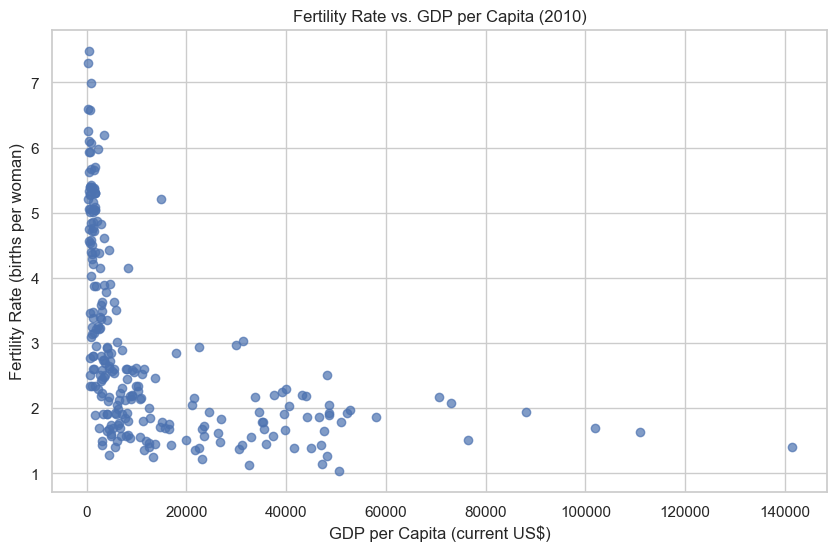

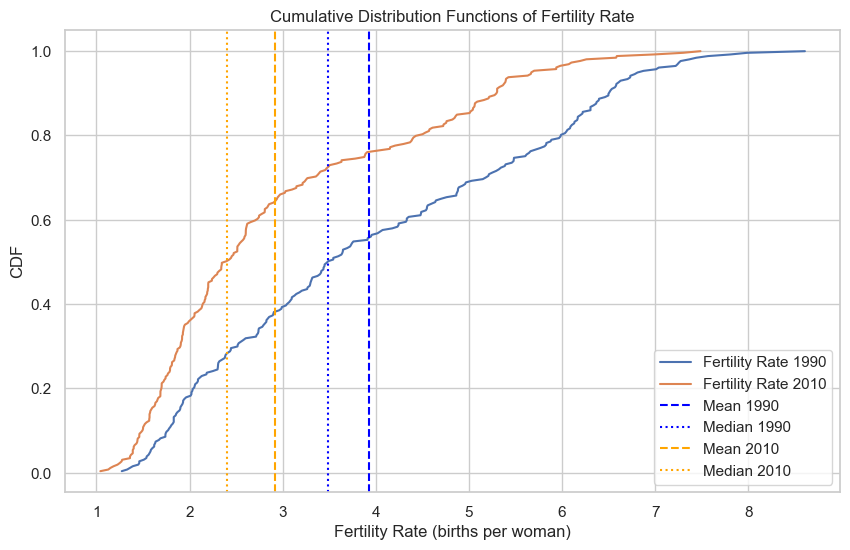

In [12]:

# Loading datasets
fertility_rate_data = pd.read_csv('feritlity_rate.csv')
gdp_per_capita = pd.read_csv("GDP_per_capita.csv" , skiprows=4)

# Extracting relevant columns for 2010
fertility_2010 = fertility_rate_data[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2010']].copy()
fertility_2010.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Fertility Rate']

gdp_2010 = gdp_per_capita[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2010']].copy()
gdp_2010.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'GDP per Capita']

# Merging the datasets on 'Country Name' and 'Country Code'
data_2010 = pd.merge(fertility_2010, gdp_2010, on=['Country Name', 'Country Code'])

# Scatter plot of Fertility Rate vs. GDP per Capita
plt.figure(figsize=(10, 6))
plt.scatter(data_2010['GDP per Capita'], data_2010['Fertility Rate'], alpha=0.7)
plt.title('Fertility Rate vs. GDP per Capita (2010)')
plt.xlabel('GDP per Capita (current US$)')
plt.ylabel('Fertility Rate (births per woman)')
plt.yscale('linear')
plt.grid(True)
plt.show()

# Extracting data for 1990 and 2010 for CDF analysis
fertility_1990 = fertility_rate_data[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1990']].copy()
fertility_1990.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Fertility Rate']
fertility_1990 = fertility_1990[['Fertility Rate']].dropna()

fertility_2010 = fertility_rate_data[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2010']].copy()
fertility_2010.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Fertility Rate']
fertility_2010 = fertility_2010[['Fertility Rate']].dropna()

# Computing CDF
def compute_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

# CDF for 1990 and 2010
sorted_fertility_1990, cdf_fertility_1990 = compute_cdf(fertility_1990['Fertility Rate'])
sorted_fertility_2010, cdf_fertility_2010 = compute_cdf(fertility_2010['Fertility Rate'])

# Ploting CDFs
plt.figure(figsize=(10, 6))
plt.plot(sorted_fertility_1990, cdf_fertility_1990, label='Fertility Rate 1990')
plt.plot(sorted_fertility_2010, cdf_fertility_2010, label='Fertility Rate 2010')

# Adding vertical lines for mean and median
mean_1990 = fertility_1990['Fertility Rate'].mean()
median_1990 = np.median(fertility_1990['Fertility Rate'])
mean_2010 = fertility_2010['Fertility Rate'].mean()
median_2010 = np.median(fertility_2010['Fertility Rate'])

plt.axvline(mean_1990, color='blue', linestyle='--', label='Mean 1990')
plt.axvline(median_1990, color='blue', linestyle=':', label='Median 1990')
plt.axvline(mean_2010, color='orange', linestyle='--', label='Mean 2010')
plt.axvline(median_2010, color='orange', linestyle=':', label='Median 2010')

plt.title('Cumulative Distribution Functions of Fertility Rate')
plt.xlabel('Fertility Rate (births per woman)')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()


# QUESTION 5

c:\Users\STUDENT\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


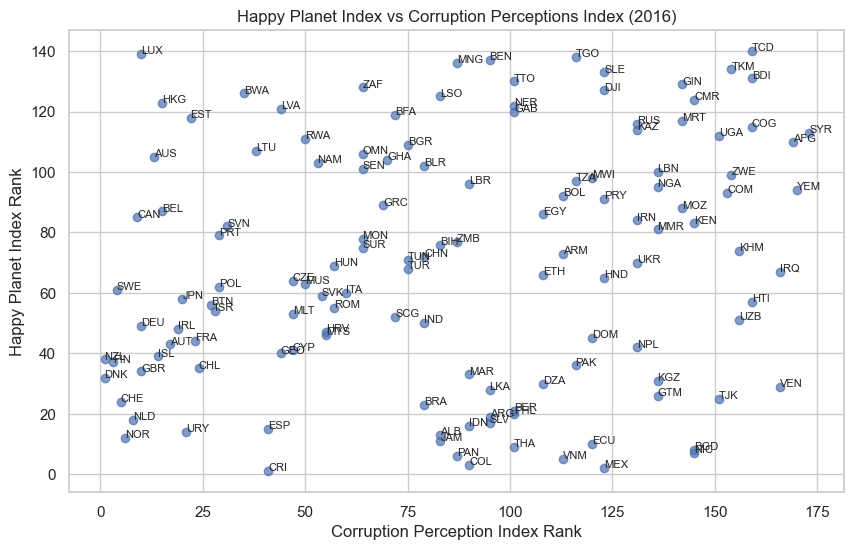

In [13]:

# Loading datasets
hpi_data = pd.read_excel("hpi-data-2016.xlsx", sheet_name="Complete HPI data", skiprows=5)
cpi_data = pd.read_excel("CPI2016_Results.xlsx", sheet_name="CPI 2015-2016")
# Cleaning and preparing the datasets
hpi_data.rename(columns={'Country': 'Country Name', 'HPI Rank': 'HPI Rank'}, inplace=True)
cpi_data.rename(columns={'CPI 2016 Rank': 'CPI Rank', 'Country': 'Country Name'}, inplace=True)

# Selecting relevant columns
hpi_data = hpi_data[['Country Name', 'HPI Rank']]
cpi_data = cpi_data[['Country Name', 'CPI Rank','WB Code']]

# Mergeing datasets on 'Country Name'
merged_data = pd.merge(hpi_data, cpi_data, on='Country Name', how='inner')


# Scatter plot of HPI Rank vs CPI Rank
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['CPI Rank'], merged_data['HPI Rank'], alpha=0.7)

# Adding labels and title
plt.title('Happy Planet Index vs Corruption Perceptions Index (2016)')
plt.xlabel('Corruption Perception Index Rank')
plt.ylabel('Happy Planet Index Rank')

# Adding labels to the points
for i, row in merged_data.iterrows():
    plt.text(row['CPI Rank'], row['HPI Rank'], row['WB Code'], fontsize=8)

plt.grid(True)
plt.show()

